<a href="https://colab.research.google.com/github/YeonJaeHong/ecc-/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3. ‘나이가 20세 이상인 사람만 선택’ 해보기 (여러가지로 데이터 필터링 해보셔도 됩니다)
4. 새로운 열 추가하기 ( 이번 과제에서는 나이를 범주형으로 변환한 뒤 ‘Child’와 ‘Adult’로 구분해주세요)
5. 결측치 확인한 뒤 결측치를 평균값으로 채워 넣어주세요. (결측치가 많이 발생한 데이터는 삭제하셔도 됩니다)
6. 나이(Age)와 요금(Fare)의 분포를 히스토그램으로 그려주세요
7. 성별에 따른 생존율을 산점도로 그려주세요

In [1]:
echo "# code-it" >> README.md
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/YeonJaeHong/code-it.git
git push -u origin main

SyntaxError: invalid syntax (<ipython-input-1-15e0cc1b6c38>, line 1)

In [39]:
import pandas as pd
import numpy as np

test=pd.read_csv("/content/test.csv")
train=pd.read_csv("/content/train.csv")

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [42]:
train = train.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

In [43]:
#열 선택
survived_df= train[["Survived"]]
pclass_df= train[["Pclass"]]
age_df= train[['Age']]
fare_df= train[['Fare']]

3. 나이가 20세 이상인 사람만 선택

In [44]:
#나이가 20세 이상인 사람만 선택’ 해보기
age_over= train[train['Age'] >= 20]
print(age_over.head())

   Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch     Fare Embarked  
0    male  22.0      1      0   7.2500        S  
1  female  38.0      1      0  71.2833        C  
2  female  26.0      0      0   7.9250        S  
3  female  35.0      1      0  53.1000        S  
4    male  35.0      0      0   8.0500        S  


4. 새로운 열 추가하기 ( 이번 과제에서는 나이를 범주형으로 변환한 뒤 ‘Child’와 ‘Adult’로 구분해주세요)

In [45]:
#나이를 범주형으로
age_df= pd.get_dummies(train[['Age']])

In [46]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [8]:
adult= train.loc[train['Age']>=20, :]
child= train.loc[train['Age']<20, :]

print(adult.head())
print(child.head())

    Age
0  22.0
1  38.0
2  26.0
3  35.0
4  35.0
     Age
7    2.0
9   14.0
10   4.0
14  14.0
16   2.0


5. 결측치 확인후 평균값으로 결측치 대체

In [9]:
#결측치 확인한 뒤 결측치를 평균값으로 채워 넣어주세요. (결측치가 많이 발생한 데이터는 삭제하셔도 됩니다)
age_df= train[['Age']]
age_df.isnull().sum()

,0
Age,177


In [10]:
new_age_df= age_df.fillna(age_df.mean())
new_age_df.head()
new_age_df.isnull().sum()

,0
Age,0


(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

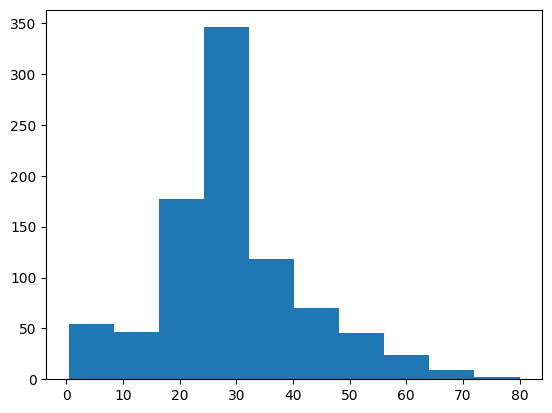

In [11]:
#나이(Age)와 요금(Fare)의 분포를 히스토그램으로 그려주세요
import matplotlib.pyplot as plt
plt.hist(new_age_df)

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

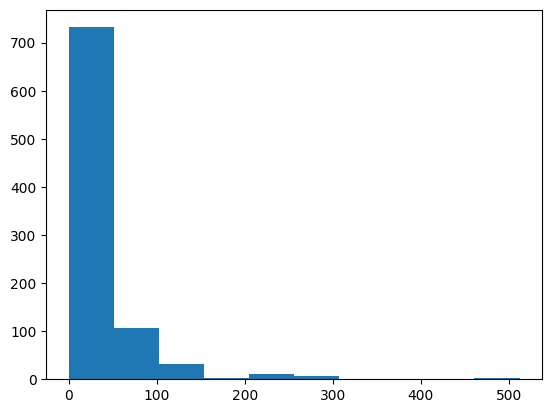

In [15]:
plt.hist(fare_df)

In [29]:
print(train.columns)

Index(['Age'], dtype='object')


In [26]:
train.groupby(['sex','Survived'])['PassengerID'].count()

KeyError: 'sex'